<a href="https://colab.research.google.com/github/bryanMontoya/machineLearning/blob/main/SVM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

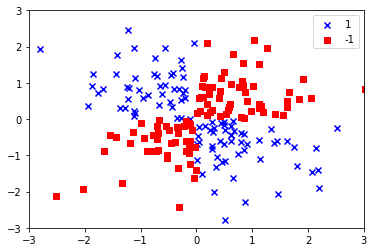

In [ ]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, -1)# -1 para una clase y uno para otra clase. EN SVM

plt.scatter(X_xor[y_xor == 1,0], X_xor[y_xor == 1, 1], c = 'b', marker = 'x', label = '1');
plt.scatter(X_xor[y_xor == -1,0], X_xor[y_xor == -1, 1], c = 'r', marker = 's', label = '-1');
plt.xlim([-3,3]);
plt.ylim([-3,3]);
plt.legend();

1.0


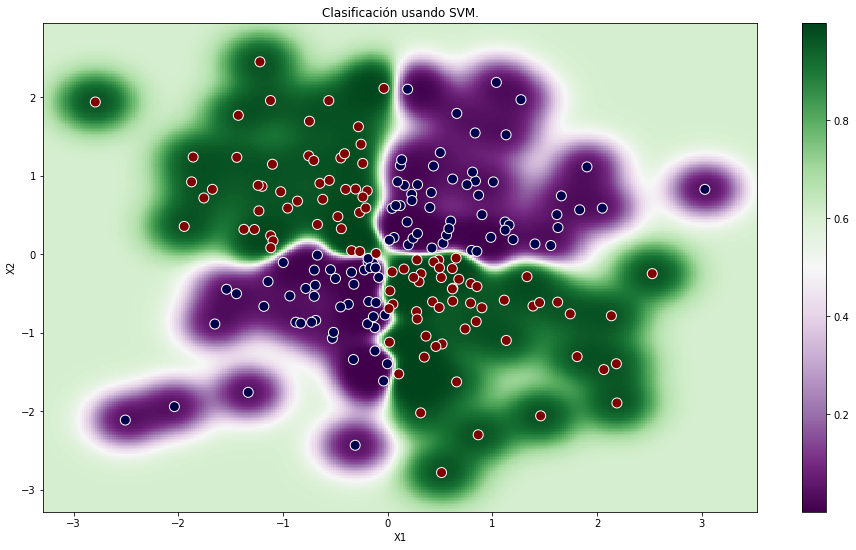

In [ ]:
h = 0.02

clf = SVC(kernel = 'rbf', random_state = 1, gamma = 10, C = 10, probability = True) # C parámetro relacionado con regularización.
#gamma aumenta el area de cobertura.
# c mejora el ajuste del modelo a los datos en train
clf.fit(X_xor, y_xor)
x_min, x_max = X_xor[:,0].min() - 0.5, X_xor[:,0].max() + 0.5
y_min, y_max = X_xor[:,1].min() - 0.5, X_xor[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

plt.figure(figsize = (16,9));
plt.pcolormesh(xx, yy, Z, cmap = 'PRGn');
plt.colorbar();

plt.scatter(X_xor[:,0], X_xor[:,1], c = y_xor, cmap = 'seismic', edgecolor = 'w', s = 100);
plt.xlim([x_min, x_max]);
plt.ylim([y_min, y_max]);

plt.title('Clasificación usando SVM.');
plt.xlabel('X1');
plt.ylabel('X2');

print(clf.score(X_xor, y_xor))